In [18]:
# Load and View the dataset

import pandas as pd
df=pd.read_csv('customer_segmentation_data.csv')

df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [19]:
#basic structure
df.info() #Check structure & data types: Nulls, types, total rows

#summary stats
df.describe() #View summary stats: Outliers, ranges, distributions

#check for missing values
df.isnull().sum() #Check for missing data: How much cleaning is needed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

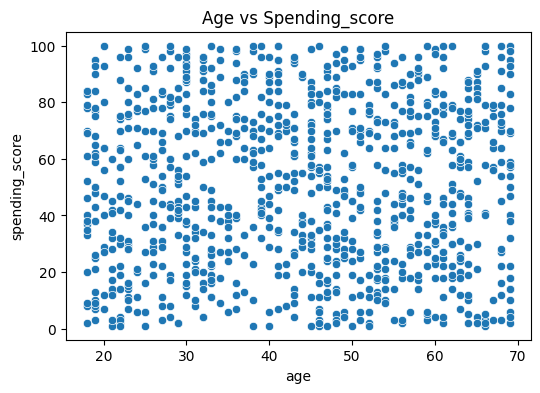

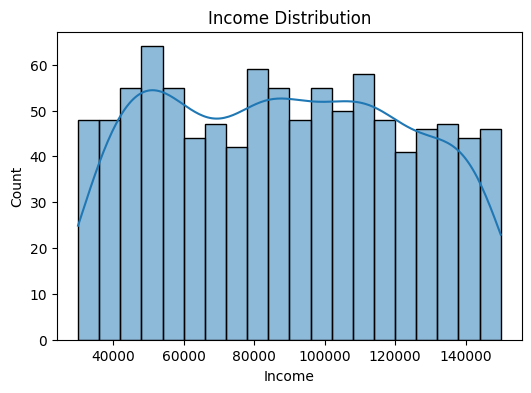

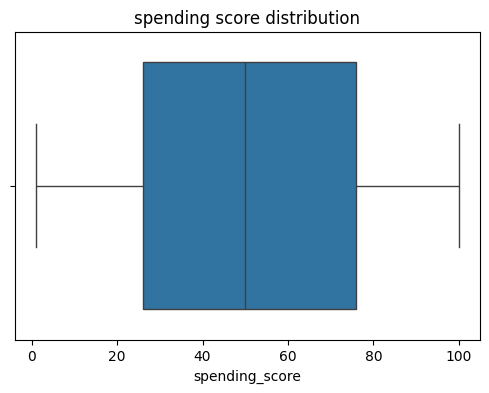

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14352\65043801.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_category',data=df,palette='Set2')


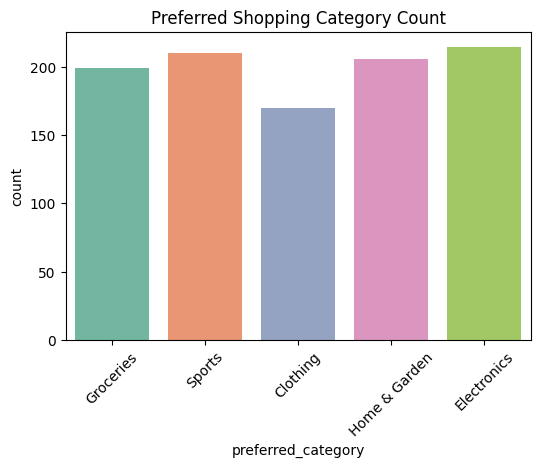

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#age vs spending score
plt.figure(figsize=(6,4))
sns.scatterplot(x='age',y='spending_score',data=df)
plt.title('Age vs Spending_score')
plt.show()

#income distribution
plt.figure(figsize=(6,4))
sns.histplot(df['income'],bins=20,kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

#spending score distribution
plt.figure(figsize=(6,4))
sns.boxplot(x='spending_score',data=df)
plt.title('spending score distribution')
plt.show()


if 'preferred_category' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='preferred_category',data=df,palette='Set2')
    plt.title('Preferred Shopping Category Count')
    plt.xticks(rotation=45)
    plt.show()    

In [21]:
df_encoded=pd.get_dummies(df,columns=['gender','preferred_category'], drop_first=True)
#one-hot encodinggg---- mane holo convert korchi to binary

In [22]:
from sklearn.preprocessing import StandardScaler

# Drop 'id' column
df_scaled = df_encoded.drop(['id'], axis=1)

#create an instance of the scaler tool.
scaler = StandardScaler()

# Apply Standard Scaler
scaled_data = scaler.fit_transform(df_scaled)

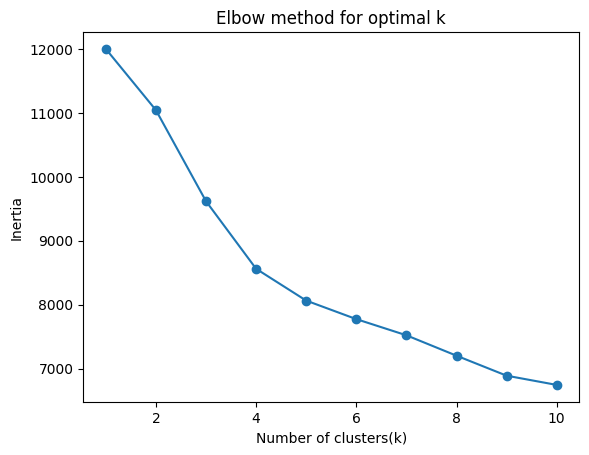

In [23]:
from sklearn.cluster import KMeans

#creates a list
inertia=[]

#loop chalabo for cluster division
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=42) #kmeans is a variable and It stores the KMeans object
    kmeans.fit(scaled_data) # This line runs the actual clustering algorithm on your scaled data for the current k.
    inertia.append(kmeans.inertia_) 

#plot the elbow
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(scaled_data)

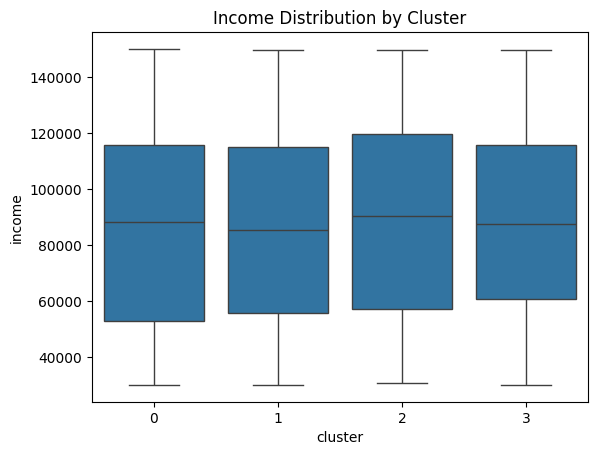

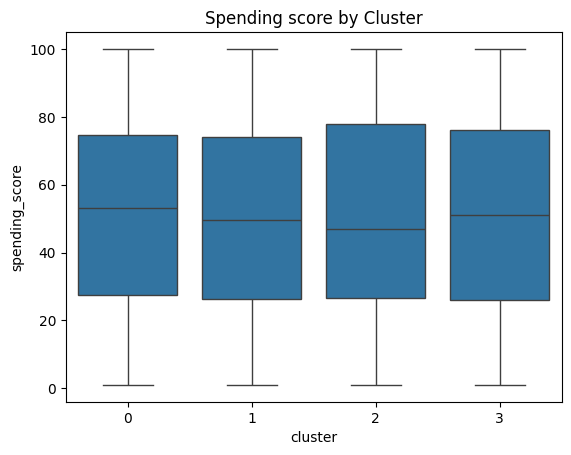

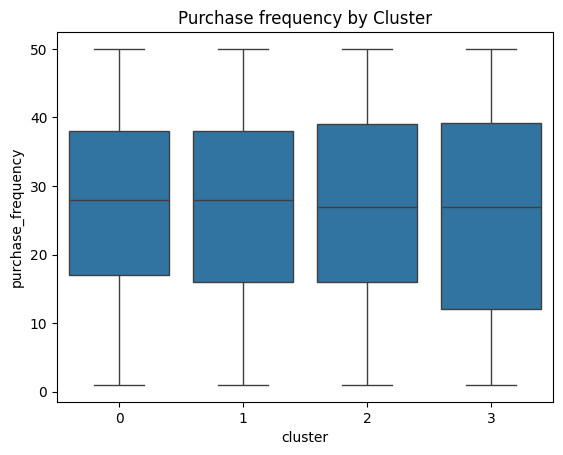

In [30]:
df_encoded.groupby('cluster').mean()

sns.boxplot(x='cluster',y='income',data=df)
plt.title("Income Distribution by Cluster")
plt.show()

sns.boxplot(x='cluster',y='spending_score',data=df)
plt.title("Spending score by Cluster")
plt.show()

sns.boxplot(x='cluster',y='purchase_frequency',data=df)
plt.title("Purchase frequency by Cluster")
plt.show()


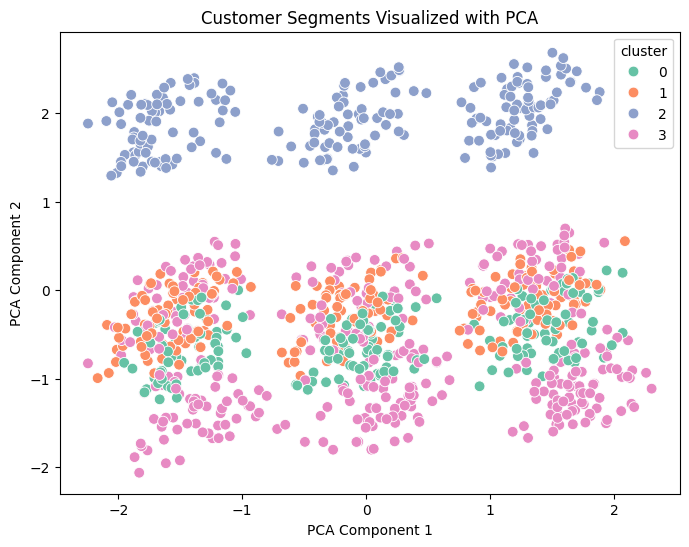

In [31]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce scaled data to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df['cluster'], palette='Set2', s=60)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [33]:
# ✅ Step 10 (Optional): Save clustered data
df.to_csv("clustered_customers.csv", index=False)
print("Clustered data saved as clustered_customers.csv")


Clustered data saved as clustered_customers.csv


## Cluster Insights

- **Cluster 0**: 🔵 Moderate Income | Moderate Spending  
  → Potential for loyalty programs or upgrade campaigns

- **Cluster 1**: 🟢 High Income | High Spending  
  → Target for premium products and personalized offers

- **Cluster 2**: 🔴 Low Frequency | Medium Income  
  → Send re-engagement campaigns and discount offers

- **Cluster 3**: 🟡 High Purchase Frequency | Moderate Spending  
  → Promote bundles or subscription models
